Group Project Proposal

Each proposal should include the following sections:

Title:

Introduction:
Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
Clearly state the question you will try to answer with your project
Identify and describe the dataset that will be used to answer the question


For the group project, we will be working with the Dry Bean Dataset. This dataset contains information on 7 different Dry beans. Images of over 13,000 grains were taken by a high-resolution camera. Based on these images, data was recorded for 16 features such as area, perimeter, aspect ration, etc. For our proposal, we will be attempting to classifying new grains into one of the seven dry bean categories.

Preliminary exploratory data analysis:
Demonstrate that the dataset can be read from the web into R 
Clean and wrangle your data into a tidy format
Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that 
reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

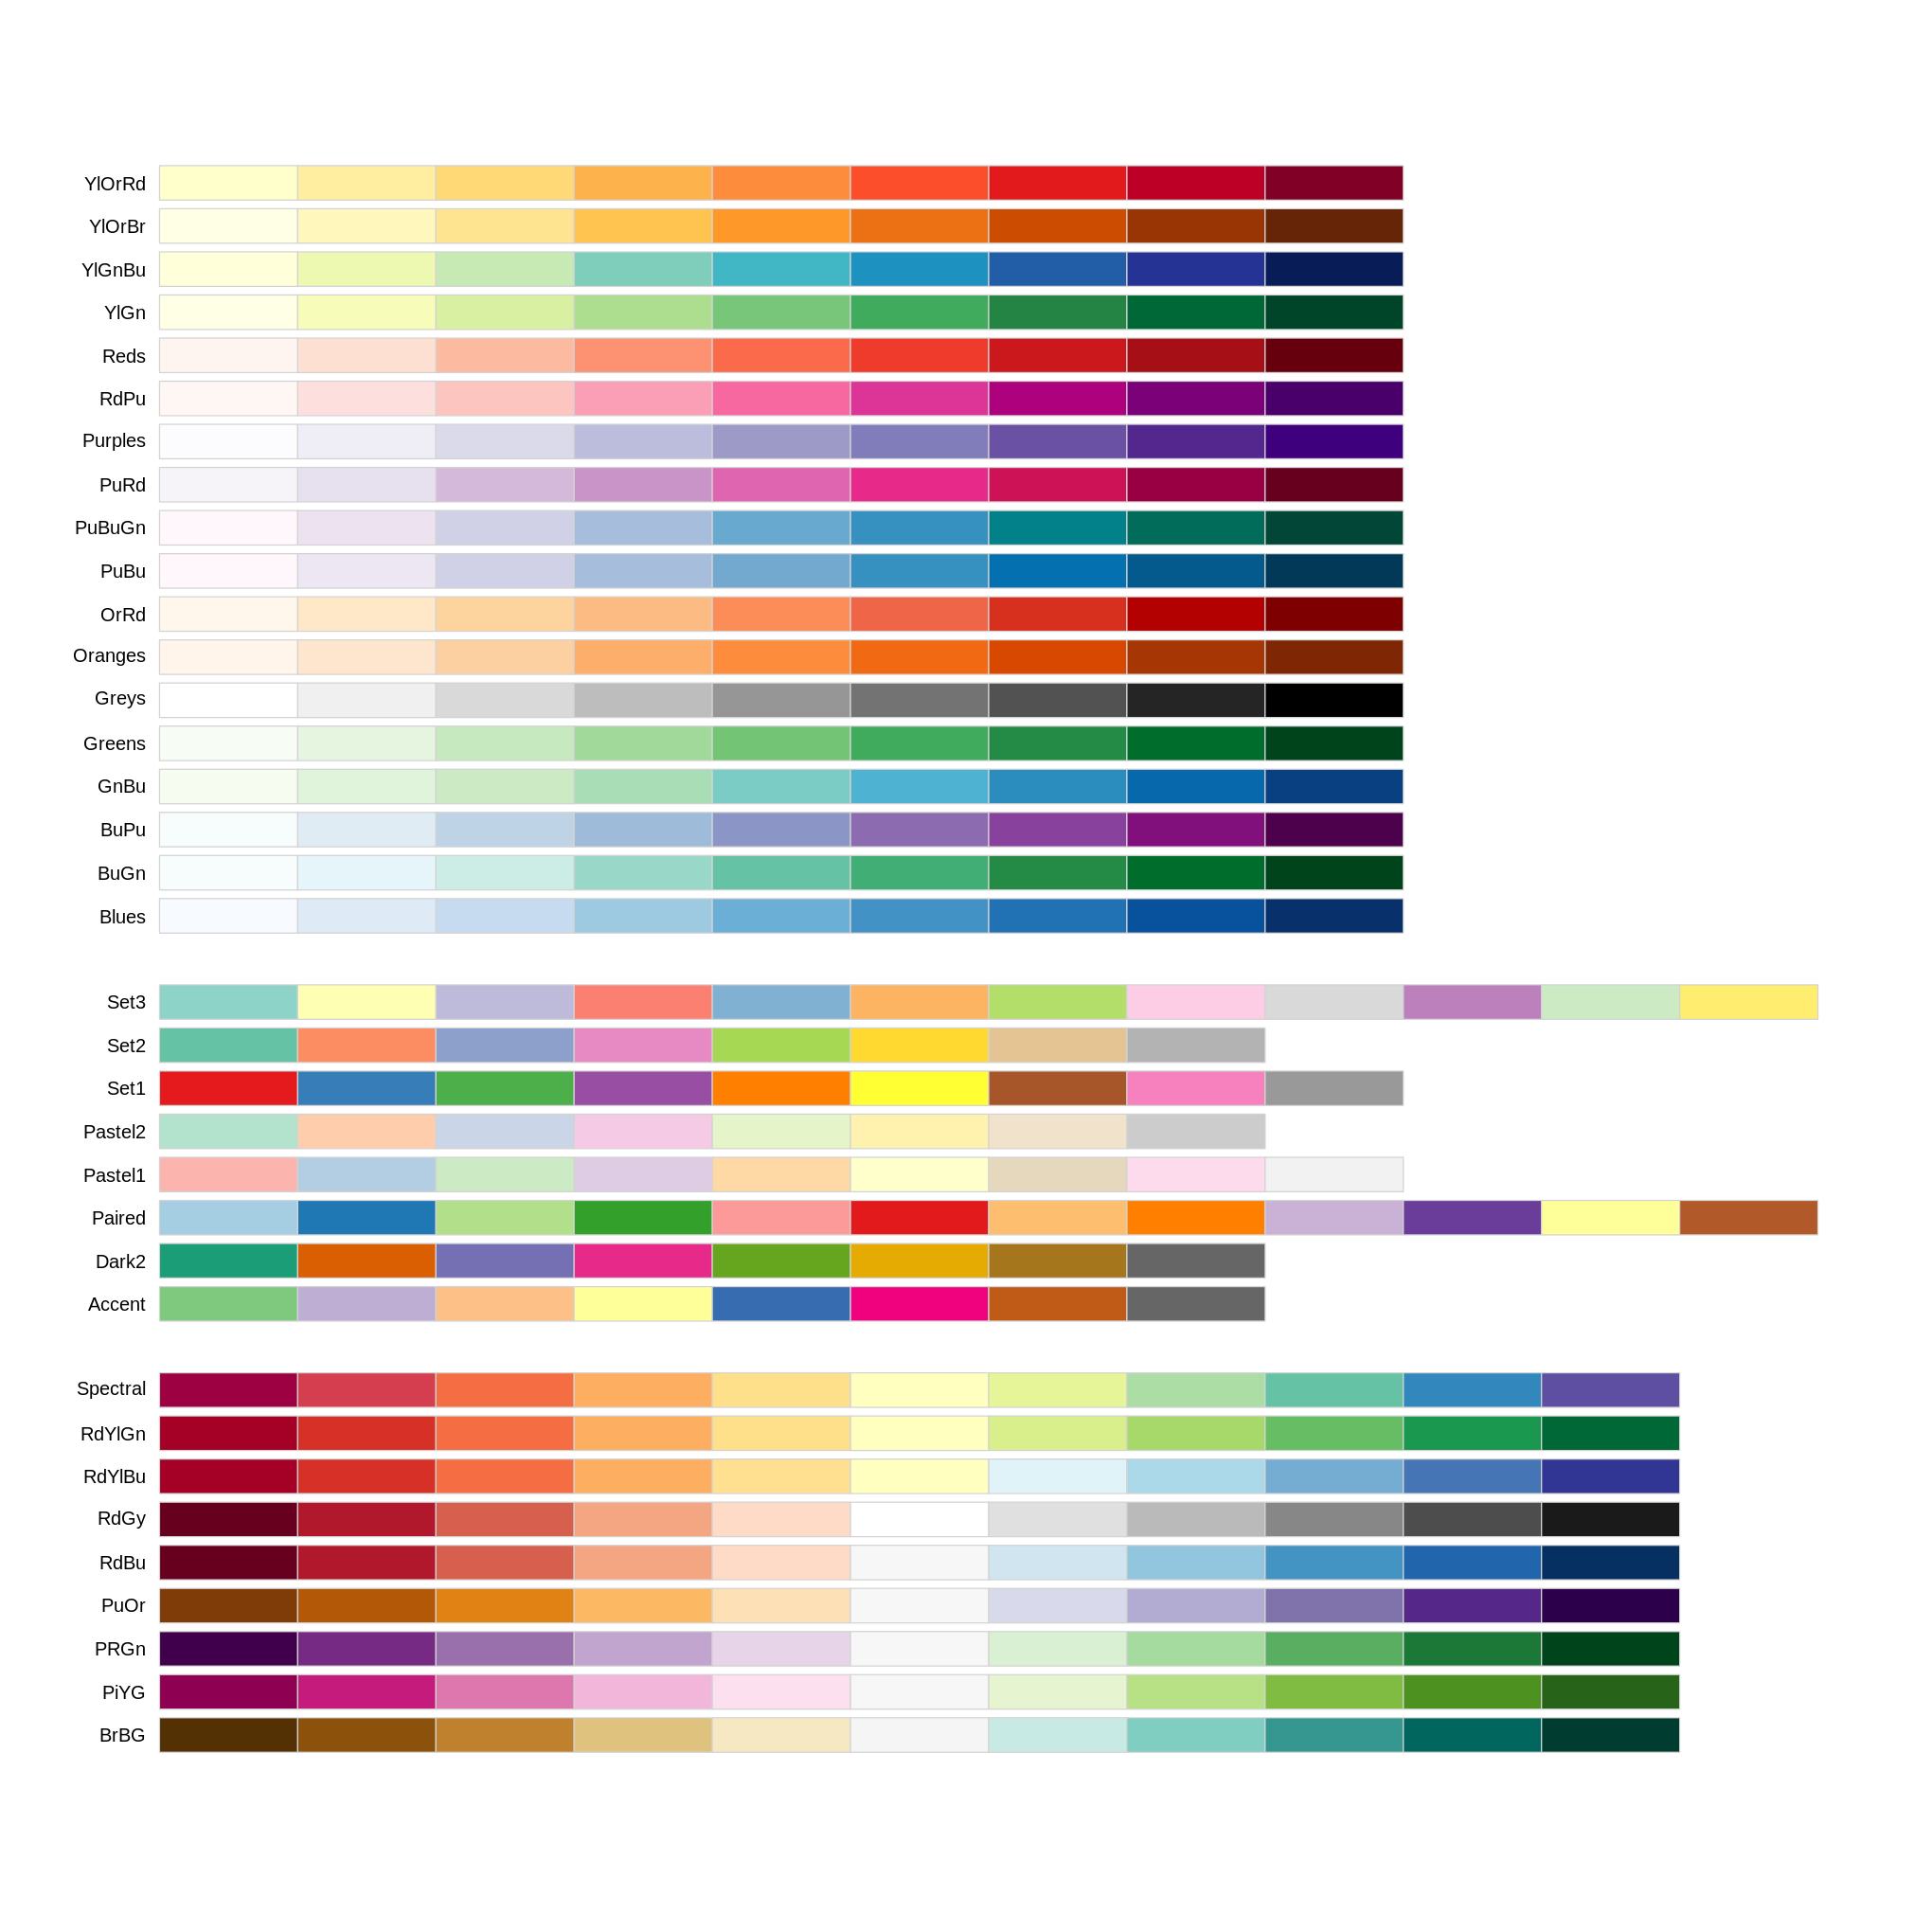

In [19]:
library(tidyverse)
library(readr)
library(repr)
library(tidymodels)
library(readxl)
library(gridExtra)
library(RColorBrewer)
display.brewer.all()
options(repr.matrix.max..rows = 6)
set.seed(99999)

In [3]:

url <- "https://github.com/Adrianna-Nimmons/dsci-100-project-group51/raw/main/beans.xlsx"
download.file(url, "beans.xlsx")
beans_data <- read_excel("beans.xlsx")
beans_data <- mutate(beans_data, Class = as_factor(Class))

beans_split <- initial_split(beans_data, prop = 0.75, strata = Class)
beans_training <- training(beans_split)
beans_testing <- testing(beans_split)

new_table_1<- beans_training |>
            group_by(Class)|>
            # summarize(count=n())
             summarize(Mean_Shape_Factor_1 = mean(ShapeFactor1), Mean_Shape_Factor_2 = mean(ShapeFactor2),Mean_Equivalent_Diameter = mean(EquivDiameter), Mean_Minor_Axis_Length = mean(MinorAxisLength), Mean_Convex_Area = mean(ConvexArea), Mean_Roundness = mean(roundness),count=n())

beans_data
new_table_1


Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
28395,610.291,208.1781,173.8887,1.197191,0.5498122,28715,190.1411,0.7639225,0.9888560,0.9580271,0.9133578,0.007331506,0.003147289,0.8342224,0.9987239,SEKER
28734,638.018,200.5248,182.7344,1.097356,0.4117853,29172,191.2728,0.7839681,0.9849856,0.8870336,0.9538608,0.006978659,0.003563624,0.9098505,0.9984303,SEKER
29380,624.110,212.8261,175.9311,1.209713,0.5627273,29690,193.4109,0.7781132,0.9895588,0.9478495,0.9087742,0.007243912,0.003047733,0.8258706,0.9990661,SEKER
30008,645.884,210.5580,182.5165,1.153638,0.4986160,30724,195.4671,0.7826813,0.9766957,0.9039364,0.9283288,0.007016729,0.003214562,0.8617944,0.9941988,SEKER
30140,620.134,201.8479,190.2793,1.060798,0.3336797,30417,195.8965,0.7730980,0.9908933,0.9848771,0.9705155,0.006697010,0.003664972,0.9419004,0.9991661,SEKER
30279,634.927,212.5606,181.5102,1.171067,0.5204007,30600,196.3477,0.7756885,0.9895098,0.9438518,0.9237260,0.007020065,0.003152779,0.8532696,0.9992358,SEKER
30477,670.033,211.0502,184.0391,1.146768,0.4894779,30970,196.9886,0.7624015,0.9840814,0.8530799,0.9333736,0.006924899,0.003242016,0.8711862,0.9990487,SEKER
30519,629.727,212.9968,182.7372,1.165591,0.5137596,30847,197.1243,0.7706818,0.9893669,0.9671092,0.9254804,0.006979152,0.003158285,0.8565140,0.9983446,SEKER
30685,635.681,213.5341,183.1571,1.165852,0.5140809,31044,197.6597,0.7715615,0.9884358,0.9542398,0.9256585,0.006958910,0.003151550,0.8568437,0.9989530,SEKER


Class,Mean_Shape_Factor_1,Mean_Shape_Factor_2,Mean_Equivalent_Diameter,Mean_Minor_Axis_Length,Mean_Convex_Area,Mean_Roundness,count
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
SEKER,0.006336551,0.0025427415,224.8512,201.8332,40233.19,0.9451365,1519
BARBUNYA,0.005356088,0.0013974499,297.1777,240.4068,70952.69,0.8011084,982
BOMBAY,0.003438398,0.0008413027,469.6162,374.7865,176325.08,0.8646603,394
CALI,0.005464965,0.0011067326,309.2667,236.1263,76557.73,0.8457226,1222
HOROZ,0.006998111,0.0010477597,260.9422,184.3833,54522.55,0.7937945,1436
SIRA,0.006715347,0.0016862666,238.3069,190.9101,45257.73,0.8848883,1994
DERMASON,0.007750536,0.0021651493,201.6740,165.7532,32496.29,0.9088095,2659


In [ ]:
beans_shape_factor_plot <- ggplot(beans_training, aes( x = ShapeFactor1, y = ShapeFactor2, color = Class, shape = Class))+
geom_point()+
labs( x = "Shape Factor 1", y = "Shape Factor 2", color = "Bean Class", shape = "Bean Class")+
theme(text = element_text(size = 25))+
scale_fill_brewer(palette = "Set1")
options(repr.plot.width = 17, repr.plot.height = 17)

beans_shape_factor_plot


Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 2659 rows containing missing values (geom_point).”


In [ ]:
Methods:
Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist 
in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
Describe at least one way that you will visualize the results

In [ ]:
Expected outcomes and significance:
What do you expect to find?
What impact could such findings have?
What future questions could this lead to?

In [ ]:
Please submit your group project proposal. Only one member of your team needs to submit. 

what do you expect to find?

We will find which characteristics best fit the 7 different type of dry beans in order to catorgize them. We expect that each type of bean will have significant differences in features when compared to the other bean types that will allow identification of the bean type. 

ShapeFactor2, Minor Axis Length, and ShapeFactor1 along with EquivDiameter, Roundness and ConvexArea